# Part I - PROSPER LOAN DATA
## by(Chidubem Anyali)

## Introduction
This is a dataset for loan company, called Proper Loan. This particular dataset is comprised of 81 columns/variables and 113937 rows/observations. Because of the complexity of the dataset, judging from the number of columns it has, we would be ignoring some of the columns that are not necessary for the insight we want to derive. I would be using python programming language to analyze this dataset and with the help of matplotlib and seaborn libraries, the visualization of this dataset would be made possible. Some of the key questions that I would be using the dataset to answer are:
**What factors affect a loan’s outcome status?
**What affects the borrower’s APR or interest rate?
**Are there differences between loans depending on how large the original loan amount was?





## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.shape

(113937, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?

> This dataset has 113937 rows and 81 columns

### What is/are the main feature(s) of interest in your dataset?

>  **What factors affect a loan’s outcome status?
   **What affects the borrower’s APR or interest rate?
   **Are there differences between loans depending on how large the original loan amount was?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The variables tha i will be using to support my investigation are: Income Verifiable, Listing Category, Income Range, Prosper Rating, Term of Loan, Borrower APR, Loan Status, Loan Original Amount, Estimated Effective Yield, Monthly Loan Payment, 





## Univariate Exploration




### Question: 
What is the ratio of true to false income verifiable?

In [5]:
df.IncomeVerifiable.value_counts()

True     105268
False      8669
Name: IncomeVerifiable, dtype: int64

In [6]:
#let's query the income verifiable column to distinguish true from false income verifiable
income_true = df.query('IncomeVerifiable == True')
income_false = df.query('IncomeVerifiable == False')




### Visualization

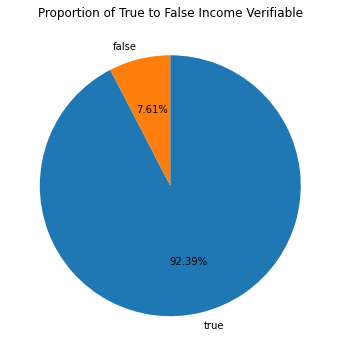

In [7]:
#lets create a pie chart for the income verifiable variable. 
plt.figure(figsize=(8,6))

true_percent = (len(income_true)/len('IncomeVerifiable') * 100)
false_percent = (len(income_false)/len('IncomeVerifiable') * 100)

percent = [true_percent, false_percent]
label = ['true', 'false']
plt.pie(percent, labels = label, autopct = '%.2f%%', startangle = 90, counterclock = False )
plt.title('Proportion of True to False Income Verifiable')
plt.show()





### Observation
This pie chart depicts the proportion of borrowers with verifiable income. This chart shows that over 92.39% of the borrowers income has been verified. This is a good outlook on the business and this practice should continue.


### Question: 
What is the count of the values in the listing category?

In [8]:
df['ListingCategory (numeric)'].value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

### Visualization
because i would be using the count plot fuction alot during exploration, i have decided to create a function to avoid repetition


In [9]:
def myCountPlot(df, xVar):
    #set plot dimensions
    plt.figure(figsize=[7,5])
    
    #plot
    sb.countplot(data=df, x= xVar, color = 'red');
    
    #add title and format it
    plt.title(f'''Count of {xVar}'''.title(), fontsize=14, weight = 'bold')
    
    #add x label and format it
    plt.xlabel(xVar.title(), fontsize = 10, weight = 'bold')
    
    #add y label and format it
    plt.ylabel('count'.title(), fontsize = 10, weight = 'bold')

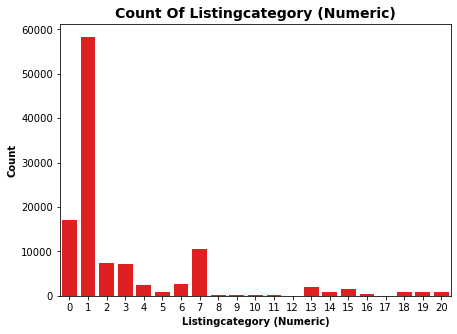

In [10]:
# making a bar chart for the listing category, since it is a categorical variable

myCountPlot(df, 'ListingCategory (numeric)')

### Observation
This chart shows that 58308(51%) of the total borrowers, take the loan for Debt consolidation which means they use the amount borrowed to offset other liabilites. Only a small fraction of the borrowers take loans for engagement ring, baby & adoption, cosmetic procedure, boat, green loan and RV. 

### Question: 
What is the count of the values in income range?

### Visualization

In [11]:
#importing a dictionary that will help change the data type for prosper rating to a categorical data type
from pandas.api.types import CategoricalDtype

In [12]:
#let's arrange income range in ascending order
income_range = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not Employed', 'Not displayed']
income_order = CategoricalDtype(categories = income_range, ordered=True)
df['IncomeRange']= df['IncomeRange'].astype(income_order)

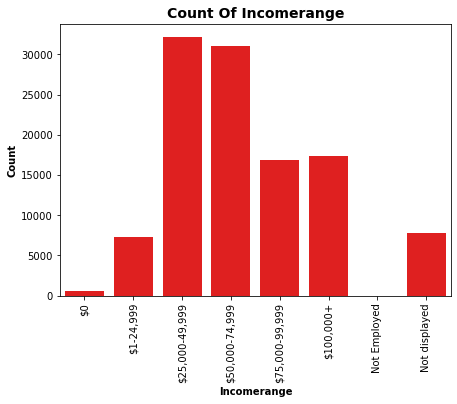

In [13]:
myCountPlot(df, 'IncomeRange')

plt.xticks(rotation = 90);

### Observation:
From this chart it is evident that we have most of our borrowers within the income range of $25,000-49,999. And for those that earn no money they are have the least number of borrowers.

### Question:
What is the count of the values in prosper rating?

In [14]:
#let's arrange prosper rating from the highest to the lowest
prosper_rating = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
prosper_order = CategoricalDtype(categories = prosper_rating, ordered=True)
df['ProsperRating (Alpha)']= df['ProsperRating (Alpha)'].astype(prosper_order)

### Visualization

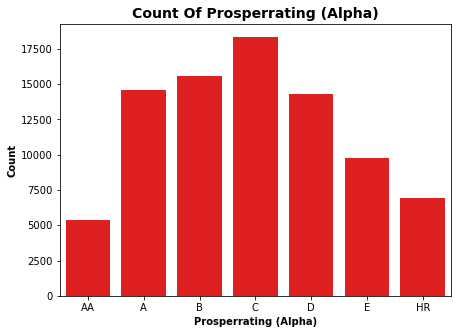

In [15]:
myCountPlot(df, 'ProsperRating (Alpha)')

### Observation:
From this chart we would see that majority of the borrowers has the proper rating C, while the least number of borrowers fall within the proper rating- AA

### Question:
What is the spread of the values in Term of Loan?

### Visualization

Text(0, 0.5, 'count')

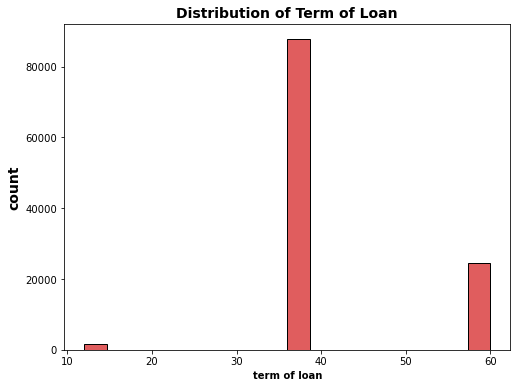

In [19]:
plt.figure(figsize=(8,6))

colour = sb.color_palette()[3]

sb.histplot(data = df, x= 'Term', color = colour)
plt.title('Distribution of Term of Loan', fontsize = 14, weight= 'bold')
plt.xlabel('term of loan',fontsize = 10, weight= 'bold')
plt.ylabel('count', fontsize = 14, weight= 'bold')

### Observation:
This chart shows that most loans are taking for 36 months which is 3 years.

### Question:
What is the spread of the values in Borrower APR?

In [17]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### Visualization

Text(0, 0.5, 'count')

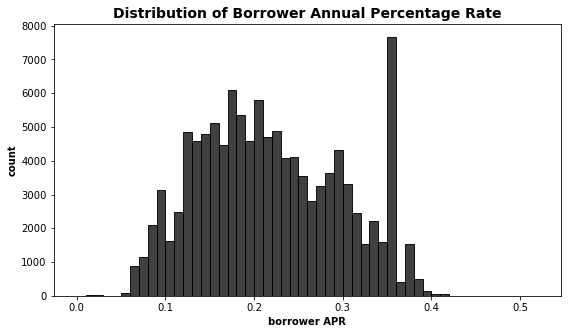

In [20]:
#creating a histogram
plt.figure(figsize = [20, 5]) 

plt.subplot(1, 2, 1)
bin = np.arange(0, df.BorrowerAPR.max()+ 0.01, 0.01)
sb.histplot(data = df, x= 'BorrowerAPR', bins = bin, color = 'black')
plt.title('Distribution of Borrower Annual Percentage Rate', fontsize = 14, weight= 'bold')
plt.xlabel('borrower APR', fontsize = 10, weight= 'bold')
plt.ylabel('count', fontsize = 10, weight= 'bold')



### Observation:
This chart shows that the Borrowers Annual Percentage is rightly skewwed and the highest percentage falls within 0.36

### Question:
What is the count of the values in Loan Status?

### Visualization

In [21]:
#let's arrange income range in ascending order
loan_status = ['Current', 'Completed', 'FinalPaymentProgress', 'PastDue (1-15 days)', 'PastDue (16-30 days)',
                  'PastDue(31-60 days)', 'PastDue(61-90 days)', 'PastDue(91-120 days)', 'Past Due (>120 days)','Chargedoff',
                 'Defaulted', 'Cancelled']
loan_order = CategoricalDtype(categories = loan_status, ordered=True)
df['LoanStatus']= df['LoanStatus'].astype(loan_order)

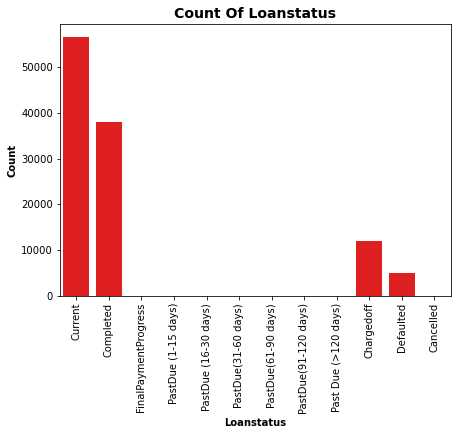

In [22]:
myCountPlot(df, 'LoanStatus')
plt.xticks(rotation = 90);

### Observation:
This chart shows that there we has over 5000 loans in the status "Current" and about 4000 loans that are in the "completed status". No loan was canceled or past 120 days. Less than 1000 loans were defaulted and a small portion of them are over due by some number of days

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I did a univariate chart for the loan status, income verifiable, borrower APR, term of loan, income range, prosper rating variables to better understand their counts and distributions. The income verifiable had about 92% of the borrowers income verified, which is very commendable for the company and the practice should be maintained. For the listing category, shows that 51% of the borrowers take loan for debt consolidation.For the income range, 25,000- 49,999 has the highest number of borrowers compared to other income range. For prosper rating, rating C had the highest number of borrowers. The distribution for the term of loan, saw a spike on the 36month. The borrower APR distribution seems like a bimodal distribution, with a spike around 3.5-3.6. The last chart showed the loan status and their counts, the current loans had the highest count. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The only change i made to the dataset here was to change the prosper rating from a string to a categorical data type

## Bivariate Exploration



### Question:
What is the relationship between loan original amount and monthly loan payment?

### Visualization

Text(0, 0.5, 'monthly loan payment')

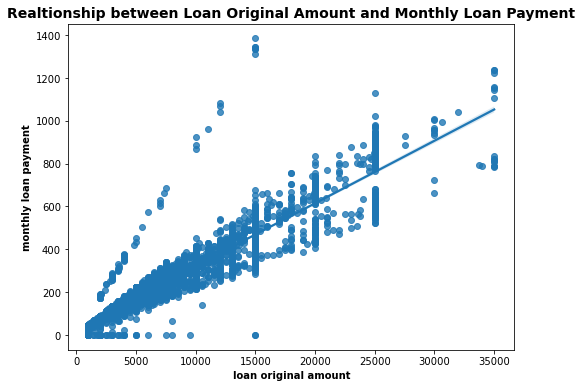

In [23]:
#making a scatter plot
np.random.seed(1)
df_new = df.sample(5000)

plt.figure(figsize=(8,6))

sb.regplot(data = df_new, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment');
plt.title('Realtionship between Loan Original Amount and Monthly Loan Payment', fontsize = 14, weight= 'bold')
plt.xlabel('loan original amount', fontsize = 10, weight= 'bold')
plt.ylabel('monthly loan payment', fontsize = 10, weight= 'bold')

### Observation:
From this chart we can see that the higher the loan original amount, the higher the monthly loan payment to be remitted by the borrower. Which means that there is a positive correlation between the loan original amount and the monthly loan payment.

### Question:
What is the relationship between Loan Original Amount and Borrower APR?

### Visualization

Text(0, 0.5, 'borrower annual percentage rate')

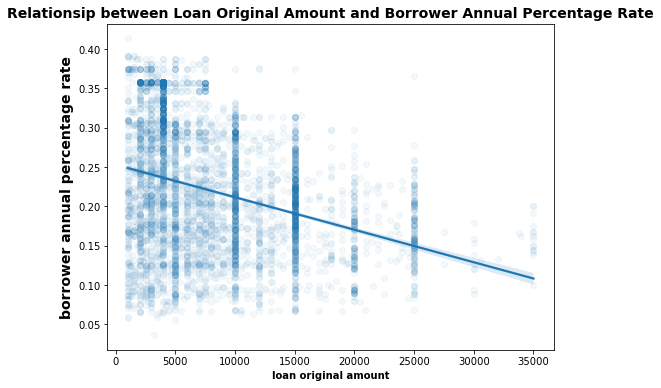

In [24]:
plt.figure(figsize=(8,6))
sb.regplot(data = df_new, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':1/20});
plt.title('Relationsip between Loan Original Amount and Borrower Annual Percentage Rate', fontsize = 14, weight= 'bold')
plt.xlabel('loan original amount', fontsize = 10, weight= 'bold')
plt.ylabel('borrower annual percentage rate', fontsize = 14, weight= 'bold')

### Observation:
This chart shows that the higher the loan original amount, the lower the borrower annual percentage rate. It shows that the annual percentage rate is higher is smaller loan amount. Which also tells us that there is a negative relationship between both variables. 

### Question:
How does Prosper Rating affect Estimated Effective Yield?

Text(0.5, 1.0, 'Relationship between Prosper Rating and Estimated Effecive Yield')

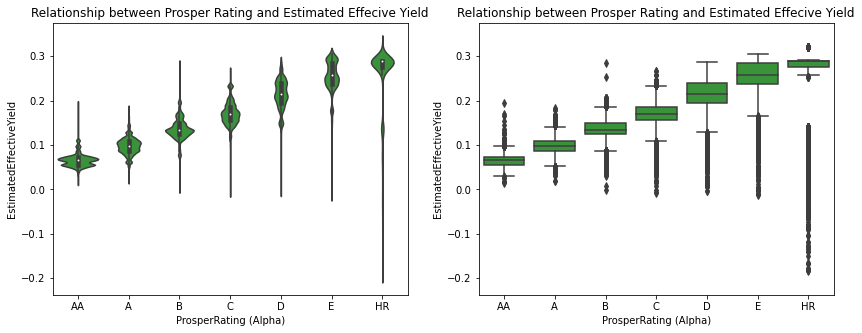

In [25]:

plt.figure(figsize = [14, 5])
base_color = sb.color_palette()[2]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=df, x='ProsperRating (Alpha)', y='EstimatedEffectiveYield', color=base_color)
plt.title('Relationship between Prosper Rating and Estimated Effecive Yield')


# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=df, x='ProsperRating (Alpha)', y='EstimatedEffectiveYield', color=base_color)
plt.ylim(ax1.get_ylim());
plt.title('Relationship between Prosper Rating and Estimated Effecive Yield')

### Observation:
From this chart, it shows that prosper loan company charges according to how risky a loan a loan is. For those that have a rating of AA their interest is the lowest, it progresses like that until the rating HR that has the highest interest attached to it. In the really sense, it is meant to be so, as the higer the risk, the higher the return for the investor/lender.

### Question:
How does Prosper Rating affect Borrower APR?

### Visualization

Text(0.5, 1.0, 'Relationship between Prosper Rating and Borrower APR')

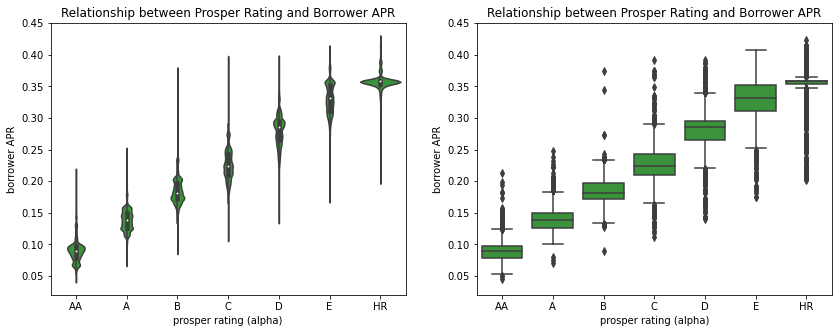

In [26]:
plt.figure(figsize = [14, 5])
base_color = sb.color_palette()[2]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=df, x='ProsperRating (Alpha)', y='BorrowerAPR', color=base_color)
plt.xlabel('prosper rating (alpha)')
plt.ylabel('borrower APR')
plt.title('Relationship between Prosper Rating and Borrower APR')

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=df, x='ProsperRating (Alpha)', y='BorrowerAPR', color=base_color)
plt.ylim(ax1.get_ylim());
plt.xlabel('prosper rating (alpha)')
plt.ylabel('borrower APR')
plt.title('Relationship between Prosper Rating and Borrower APR')

### Observation:
This chart has further buttressed our observation in the last chart. It is seen here that those with the highest rating "AA", have the lowest Borrower Annual Percentage Rate. It progresses like that until it gets to those with the lowest rating "HR", paying the highest Borrower Annual Percentage Rate.

### Question: 
Between those with higher prosper rating and those with lower propser rating, who gets a higher amount of money?

### Visualization

Text(0.5, 1.0, 'Relationsip between Loan Original Amount and Prosper Rating')

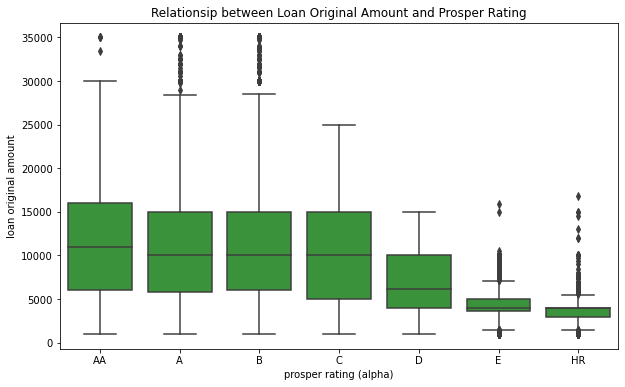

In [28]:
plt.figure(figsize = [10, 6])
base_color = sb.color_palette()[2]

sb.boxplot(data=df, x='ProsperRating (Alpha)', y='LoanOriginalAmount', color=base_color)
plt.xlabel('prosper rating (alpha)')
plt.ylabel('loan original amount')
plt.title('Relationsip between Loan Original Amount and Prosper Rating')

### Observation:
This chart shows that the borrowers with the highest ratings, also gets the highest amount of money as well. Ratings A, B, C has share a tie in terms of the amount of money gotten. Rating E and HR has some outliers(above normal loan original amount collected by borrowers)

### Question:
What is the rate of income verifiable across all prosper rating?

### Visualization

Text(0, 0.5, 'count')

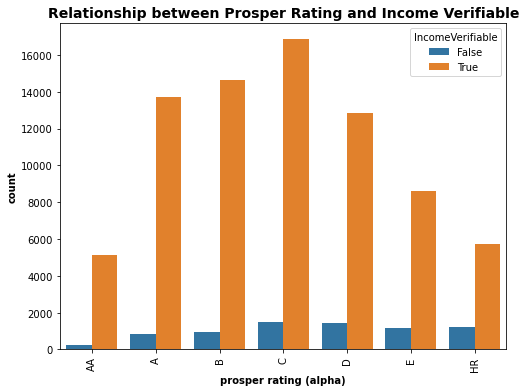

In [30]:
plt.figure(figsize=(8,6))
sb.countplot(data = df, x = 'ProsperRating (Alpha)', hue = 'IncomeVerifiable')

plt.xticks(rotation= 90);
plt.title('Relationship between Prosper Rating and Income Verifiable', fontsize = 14, weight= 'bold')
plt.xlabel('prosper rating (alpha)', fontsize = 10, weight= 'bold')
plt.ylabel('count', fontsize = 10, weight= 'bold')

### Observation:
This chart shows that generally all borrowers that cut across all the ratings has a high margin of those with verifiable income. But, those that fall in the E and HR ratings, have a larger number of unverifiable income.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The variables that i used for the bivarite charts disclosed interesting insights. I observed a positive relationship between the loan original amount and monthly loan payment. There was a negative relationship between the loan original amount and borrower annual percentage rating. I also saw an upward trend in the relationship between prosper loan rating, the estimated effective yield and borrower annual percentage rating. This shows that the lower the rating, the higher the borrower annual percentage rating, which also means a higher yield for prosper loan.



## Multivariate Exploration



### Question:
What is the relationship between Borrower Annual Percentage Rate, Estimated Effective Yield and Term of Loan?

### Visualization

Text(0, 0.5, 'estimated effective yield')

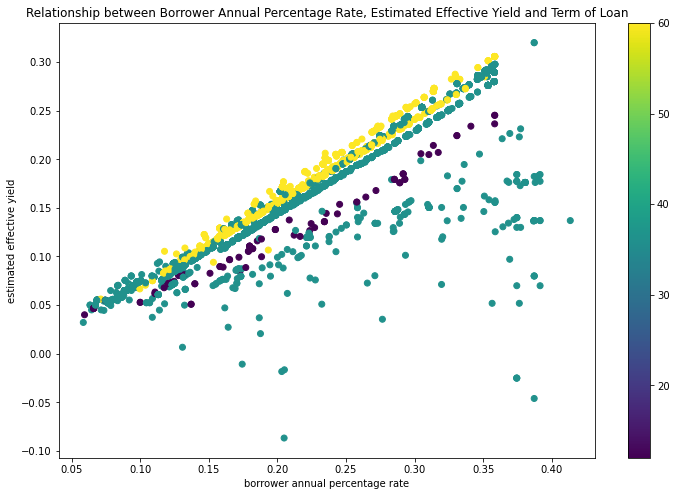

In [31]:
plt.figure(figsize=(12,8))
plt.scatter(data = df_new, x='BorrowerAPR', y='EstimatedEffectiveYield', c='Term')
cbar = plt.colorbar()
plt.title('Relationship between Borrower Annual Percentage Rate, Estimated Effective Yield and Term of Loan')
plt.xlabel('borrower annual percentage rate')
plt.ylabel('estimated effective yield')

### Observation:
This charts sums it all up, it shows that the higher the borrower annual percentage rate on the borrower, the higher the estimated effecive yield for prosper loan. The chart also shows that most of the loans were taken on a 36 months term and the higher the term of the loan, the higher the yield for prosper loan and the percentage rate for the borrower.

### Question:
Does income range and being a home owner affect the loan original amount?

### Visualization

Text(0, 0.5, 'loan original amount')

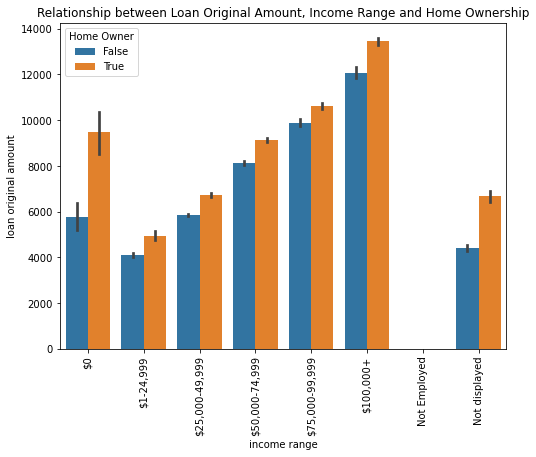

In [32]:
plt.figure(figsize=(8,6))
sb.barplot(data=df, x='IncomeRange', y ='LoanOriginalAmount', hue='IsBorrowerHomeowner')
plt.xticks(rotation= 90)
plt.legend(title='Home Owner')
plt.title('Relationship between Loan Original Amount, Income Range and Home Ownership');
plt.xlabel('income range')
plt.ylabel('loan original amount')

### Observation:
It is observed here that borrowers who earn nothing borrows the largest amount of money, although those that own houses borrows the largest compared to other income range. 

### Question:
How does the loan original amount affect loan status and income range?

### Visualization

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


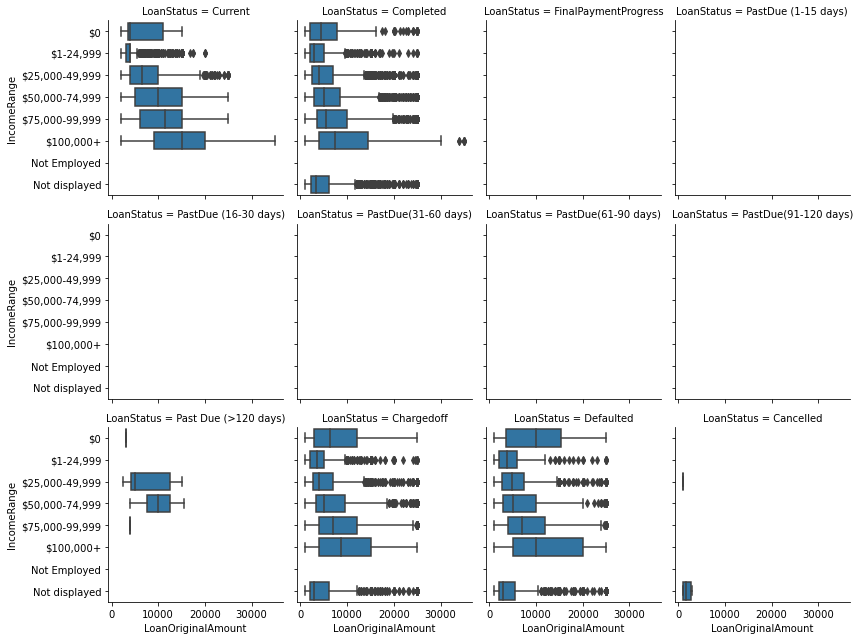

In [33]:
g = sb.FacetGrid(data=df, col = 'LoanStatus', col_wrap = 4)
g.map(sb.boxplot, 'LoanOriginalAmount', 'IncomeRange')

### Observation:
This chart shows that final payment progress, past due by 15 days, past due by 16-30 days, past due by 31- 60 days, past due by 61-90 days, past due by 91-120 days are all free of borrowers. Only a small number of borrowers are past 120 days for loan repayment.For defaulted loans, there are quite a number of borrowers, and the largest original loan amount falls within those that earn over a 100,000.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The relationship i observe is that of borrower annual percentage rate, the estimated effective yield and the term of the loans. The term of loan feature helped us to see the spread of the relationship between the borrower annual percentage rate  and estimated effective yield.

### Were there any interesting or surprising interactions between features?

> There were some loans that had negative estimated effective yield with high borrower annual percentage rate. This is strange and further investigations needs to be done to know why that happened. Defaulted loans has a large number of borrowers and should be looked into. 

## Conclusions


This dataset although had alot of columns and seemed complex, at first, I was able to come to a conclusion after so much study that the key insight I feel that my stakeholder would be interested in viewing is what factors affect their yield as a company? Upon the completion of the exploratoration of this dataset, I discovered that Proper Rating of borrowers and term of loan are key features that surely affect the effective lenders yield for Prosper Loan. The yield gotten from the borrowers with high rating is small and continuously progress as the rating gets lower, which i believe is because of the risk involved in giving out loans to such borrowers. The longer the term of loan, the more the estimated effective yield of Prosper Loan, which I also believe is as a result of the risk involed, as well. And if you look at the charts above, I was able to pull up various relationships cutting across these features, that I earlier mentioned, to further buttress my point.